In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("final.csv")

In [3]:
df.head()

,Unnamed: 0,STATE/UT,YEAR,POPULATION,MALES,FEMALES,MALES(per_100k),FEMALES(per_100k),TOTAL IPC CRIMES,TOTAL IPC CRIMES(per_100k),...,RAPE,RAPE(per_100k),RIOTS,RIOTS(per_100k),ROBBERY,ROBBERY(per_100k),THEFT,THEFT(per_100k),OTHER IPC CRIMES,OTHER IPC CRIMES(per_100k)
0,0,A&N Islands,2001,356,193,163,54213.483146,45786.516854,1316,369662.921348,...,6,1685.393258,26,7303.370787,8,2247.191011,130,36516.853933,646,181460.674157
1,1,Andhra Pradesh,2001,76210,38527,37683,50553.733106,49446.266894,260178,341396.142239,...,1742,2285.789267,6002,7875.606876,1258,1650.702008,33502,43960.110222,68688,90129.904212
2,2,Arunachal Pradesh,2001,1098,580,518,52823.315118,47176.684882,4684,426593.806922,...,66,6010.928962,48,4371.584699,168,15300.546448,886,80692.167577,1236,112568.306011
3,3,Assam,2001,26656,13777,12878,51684.423770,48311.824730,73754,276688.175270,...,1634,6129.951981,5906,22156.362545,1374,5154.561825,10734,40268.607443,18630,69890.456182
4,4,Bihar,2001,82999,43244,39755,52101.832552,47898.167448,176864,213091.723997,...,1776,2139.784817,17212,20737.599248,4406,5308.497693,19402,23376.185255,73334,88355.281389


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 68 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Unnamed: 0                                                     468 non-null    int64  
 1   STATE/UT                                                       468 non-null    object 
 2   YEAR                                                           468 non-null    int64  
 3   POPULATION                                                     468 non-null    int64  
 4   MALES                                                          468 non-null    int64  
 5   FEMALES                                                        468 non-null    int64  
 6   MALES(per_100k)                                                468 non-null    float64
 7   FEMALES(per_100k)                                             

In [5]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

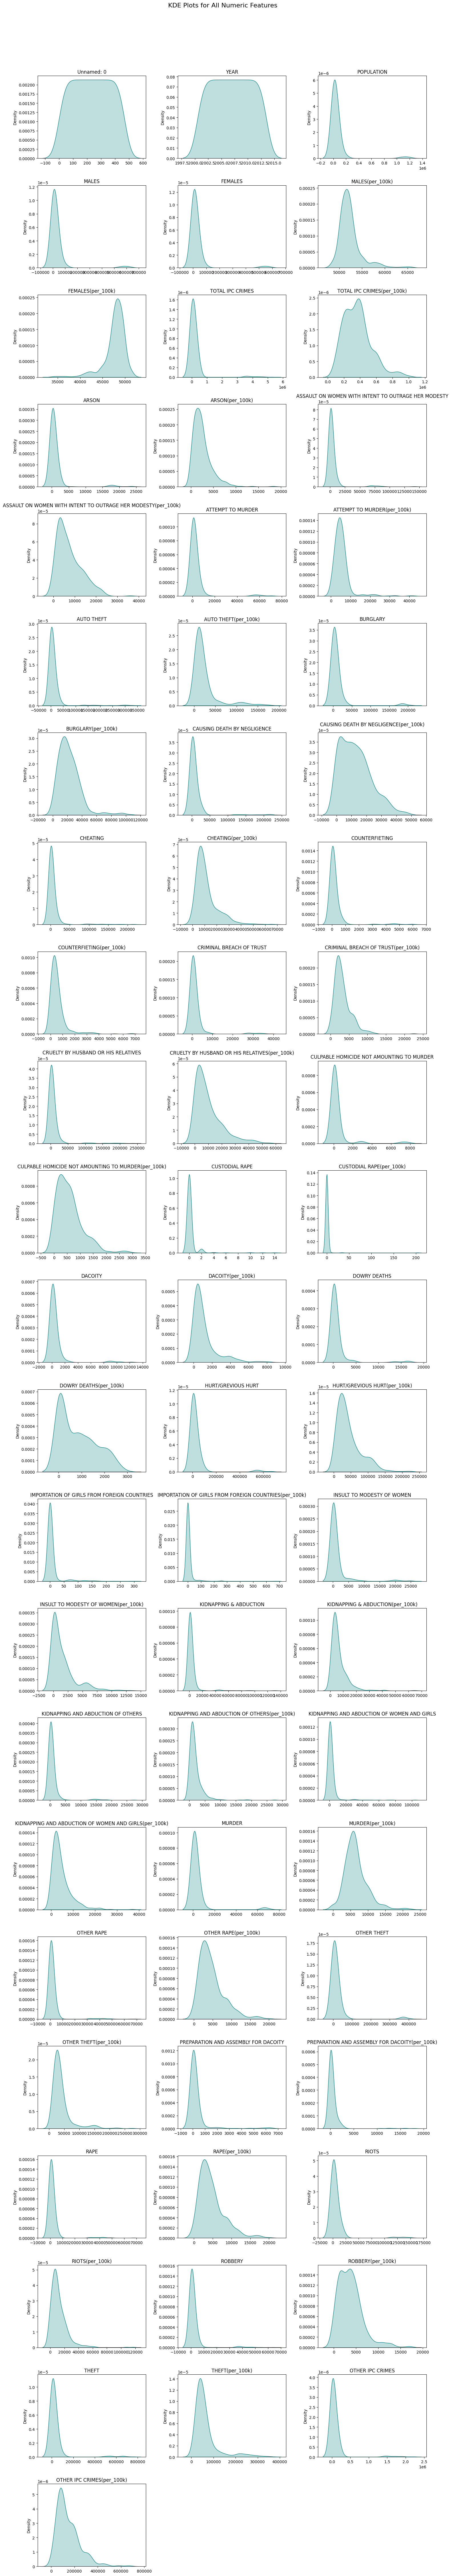

In [6]:
n_cols = 3  
n_rows = -(-len(numeric_cols) // n_cols)  

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=df, x=col, shade=True, color="teal")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Density")

plt.suptitle("KDE Plots for All Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [7]:
crime_by_state = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().sort_values(ascending=False).head(10)

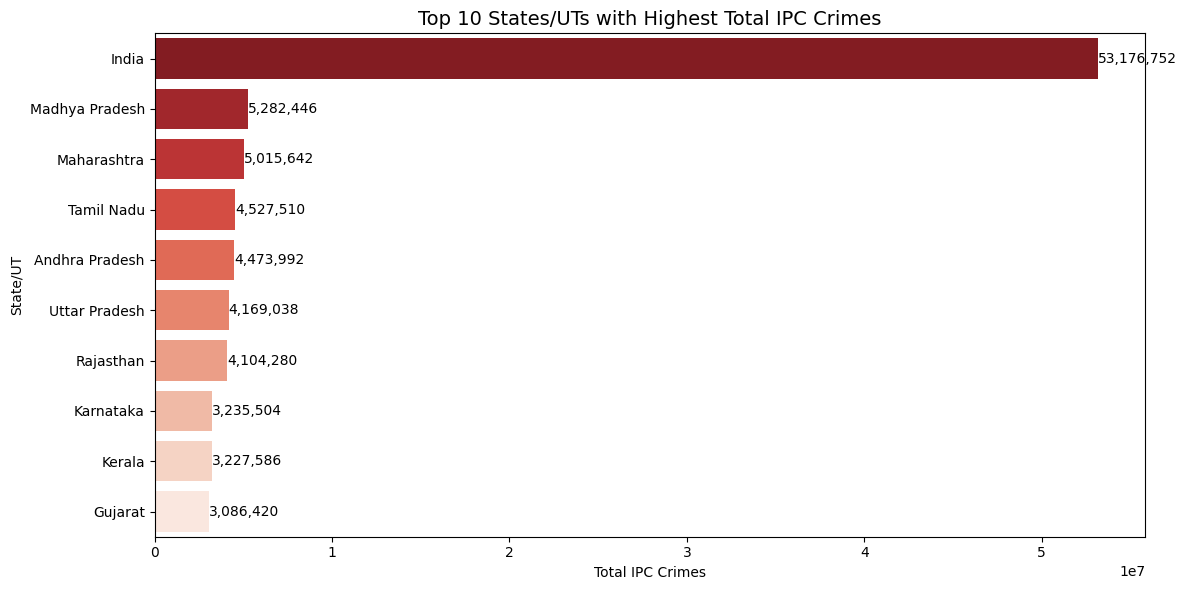

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_by_state.values, y=crime_by_state.index, palette="Reds_r")

for i, v in enumerate(crime_by_state.values):
    plt.text(v + 1000, i, f"{v:,}", va='center', fontsize=10)

plt.title("Top 10 States/UTs with Highest Total IPC Crimes", fontsize=14)
plt.xlabel("Total IPC Crimes")
plt.ylabel("State/UT")

plt.tight_layout()
plt.show()

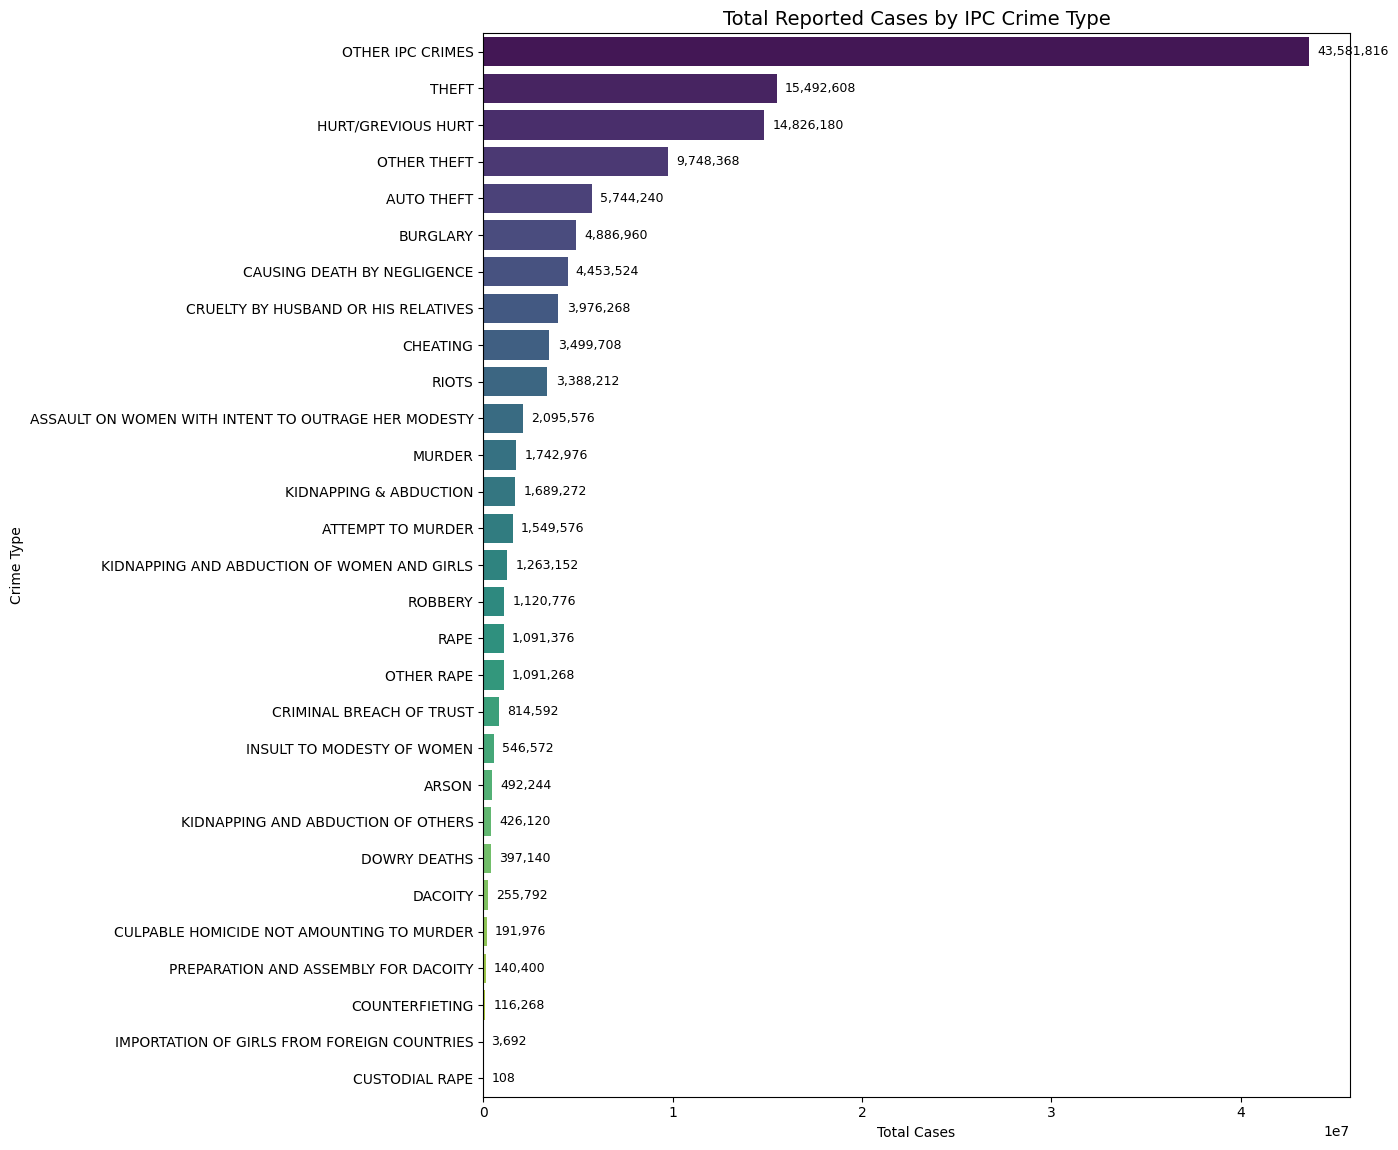

In [9]:
crime_cols = df.columns[10:]  # Starting from 'ARSON'
crime_totals = df[crime_cols].sum()

# Remove 'per_100k' columns to focus only on actual counts
crime_totals = crime_totals[~crime_totals.index.str.contains("per_100k")]

# Sort by total cases descending
crime_totals = crime_totals.sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, len(crime_totals) * 0.4))  # Dynamic height based on number of crimes
sns.barplot(x=crime_totals.values, y=crime_totals.index, palette="viridis")

# Annotate each bar
for i, v in enumerate(crime_totals.values):
    plt.text(v + max(crime_totals) * 0.01, i, f"{int(v):,}", va='center', fontsize=9)

# Add labels and title
plt.title("Total Reported Cases by IPC Crime Type", fontsize=14)
plt.xlabel("Total Cases")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()

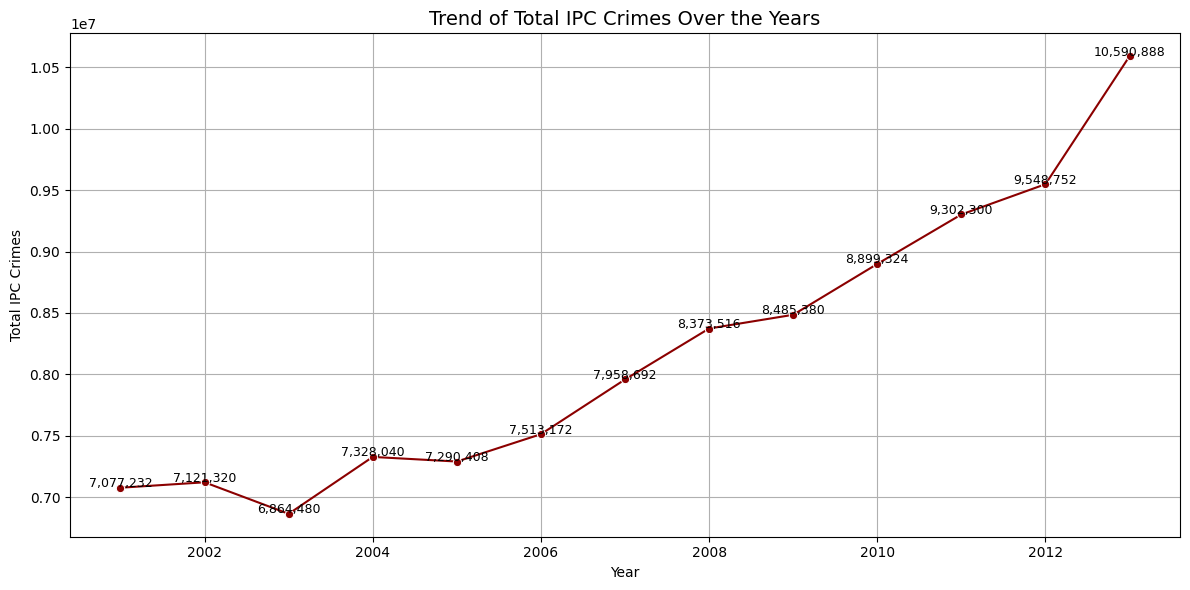

In [12]:
crime_trend = df.groupby("YEAR")["TOTAL IPC CRIMES"].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend, x="YEAR", y="TOTAL IPC CRIMES", marker="o", color="darkred")

# Annotate each point
for i, row in crime_trend.iterrows():
    plt.text(row["YEAR"], row["TOTAL IPC CRIMES"] + 5000, f"{row['TOTAL IPC CRIMES']:,}", ha='center', fontsize=9)

plt.title("Trend of Total IPC Crimes Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

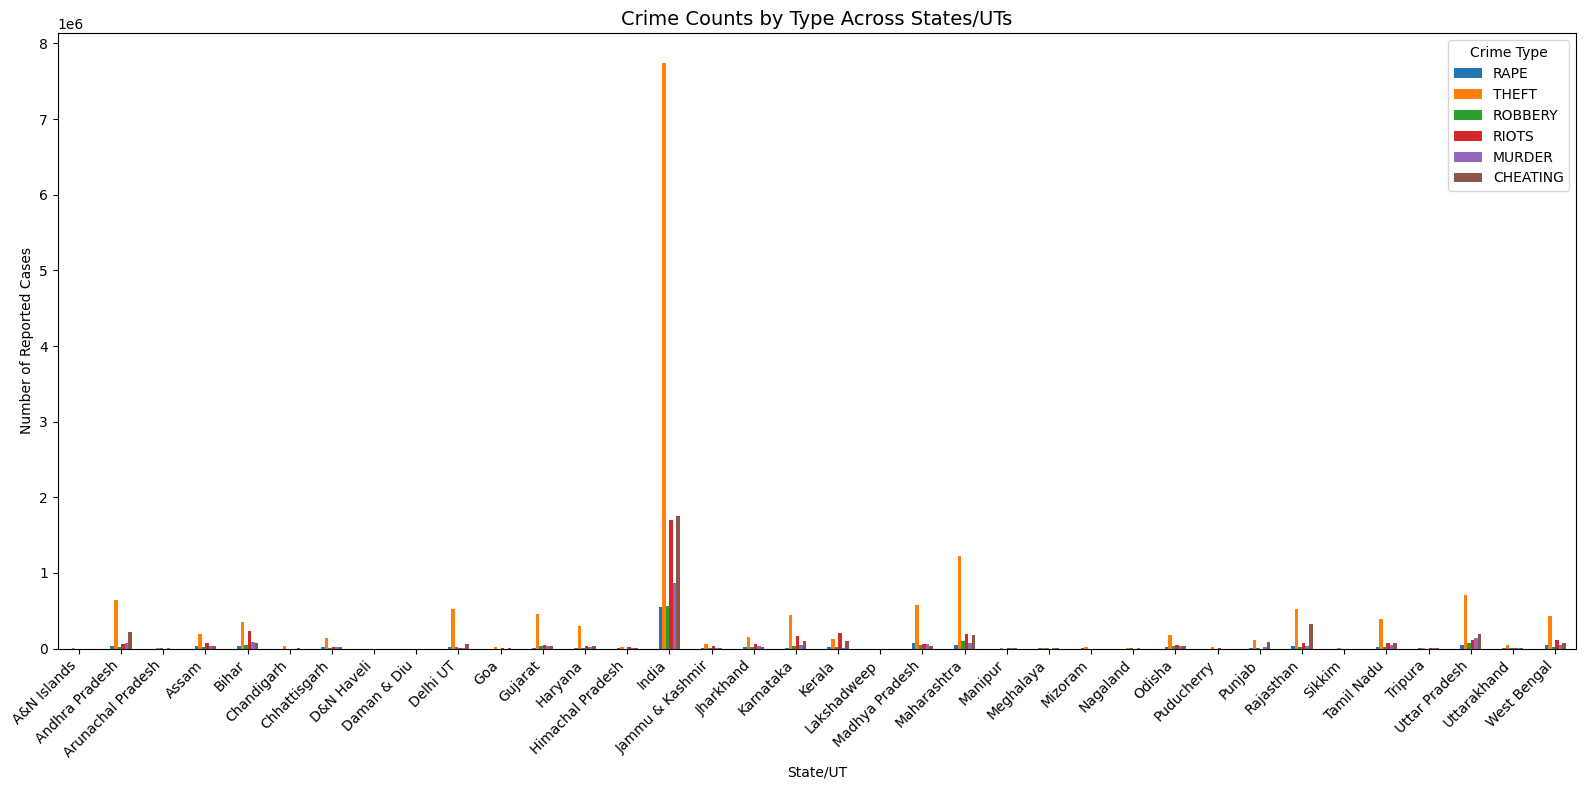

In [13]:
crime_types = ["RAPE", "THEFT", "ROBBERY", "RIOTS", "MURDER", "CHEATING"]

# Aggregate total crime counts for each crime by state
crime_by_city = df.groupby("STATE/UT")[crime_types].sum()

# Plotting
crime_by_city.plot(kind="bar", figsize=(16, 8))

plt.title("Crime Counts by Type Across States/UTs", fontsize=14)
plt.ylabel("Number of Reported Cases")
plt.xlabel("State/UT")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()


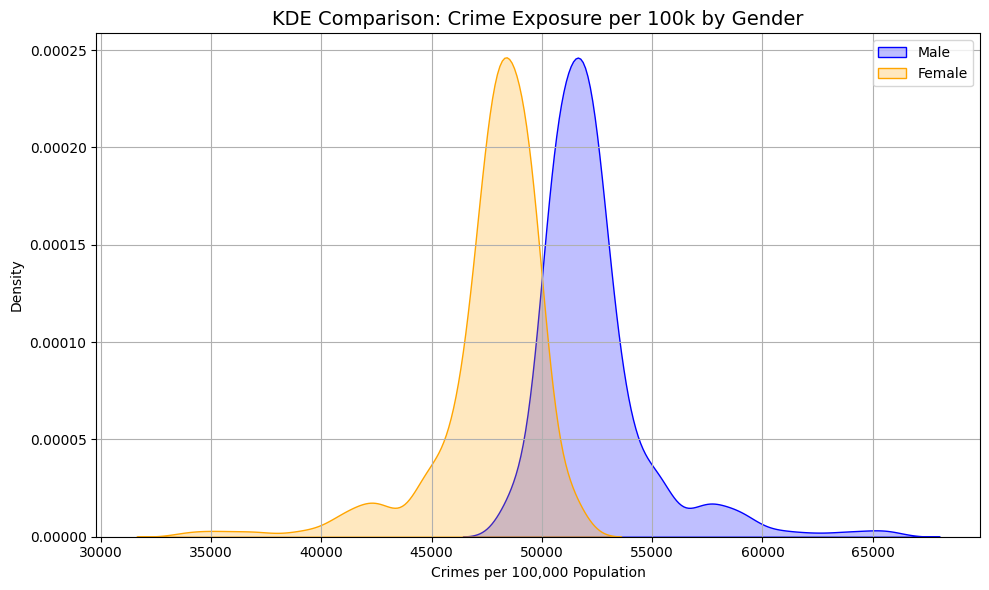

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df["MALES(per_100k)"], shade=True, label="Male", color="blue")
sns.kdeplot(df["FEMALES(per_100k)"], shade=True, label="Female", color="orange")

# Plot styling
plt.title("KDE Comparison: Crime Exposure per 100k by Gender", fontsize=14)
plt.xlabel("Crimes per 100,000 Population")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


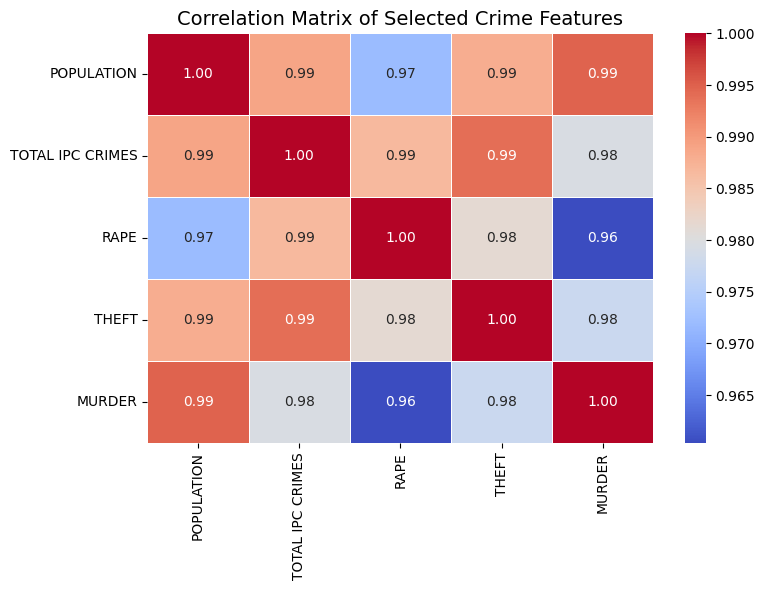

In [15]:
selected_vars = [
    "POPULATION", 
    "TOTAL IPC CRIMES", 
    "RAPE", 
    "THEFT", 
    "MURDER"
]

# Compute correlation matrix
corr_matrix = df[selected_vars].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix of Selected Crime Features", fontsize=14)
plt.tight_layout()
plt.show()